In [552]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier as RF

In [553]:
df = pd.read_csv('pokemon_alopez247.csv')

In [554]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            350 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           644 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

In [555]:
types = preprocessing.LabelEncoder()
types.fit(df['Type_1'])

print("\nLabel mapping: ")
for i, item in enumerate(types.classes_):
    print(item, '--->', i)


Label mapping: 
Bug ---> 0
Dark ---> 1
Dragon ---> 2
Electric ---> 3
Fairy ---> 4
Fighting ---> 5
Fire ---> 6
Flying ---> 7
Ghost ---> 8
Grass ---> 9
Ground ---> 10
Ice ---> 11
Normal ---> 12
Poison ---> 13
Psychic ---> 14
Rock ---> 15
Steel ---> 16
Water ---> 17


In [556]:
type = LabelEncoder()
df['Type_1'] = type.fit_transform(df['Type_1'].astype('str'))
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,9,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,9,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,9,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,6,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,6,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [557]:
body_styles = preprocessing.LabelEncoder()
body_styles.fit(df['Body_Style'])

print("\nLabel mapping: ")
for i, item in enumerate(body_styles.classes_):
    print(item, '--->', i)


Label mapping: 
bipedal_tailed ---> 0
bipedal_tailless ---> 1
four_wings ---> 2
head_arms ---> 3
head_base ---> 4
head_legs ---> 5
head_only ---> 6
insectoid ---> 7
multiple_bodies ---> 8
quadruped ---> 9
serpentine_body ---> 10
several_limbs ---> 11
two_wings ---> 12
with_fins ---> 13


In [558]:
body_style = LabelEncoder()
df['Body_Style'] = body_style.fit_transform(df['Body_Style'].astype('str'))
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,9,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,9
1,2,Ivysaur,9,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,9
2,3,Venusaur,9,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,9
3,4,Charmander,6,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,0
4,5,Charmeleon,6,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,0


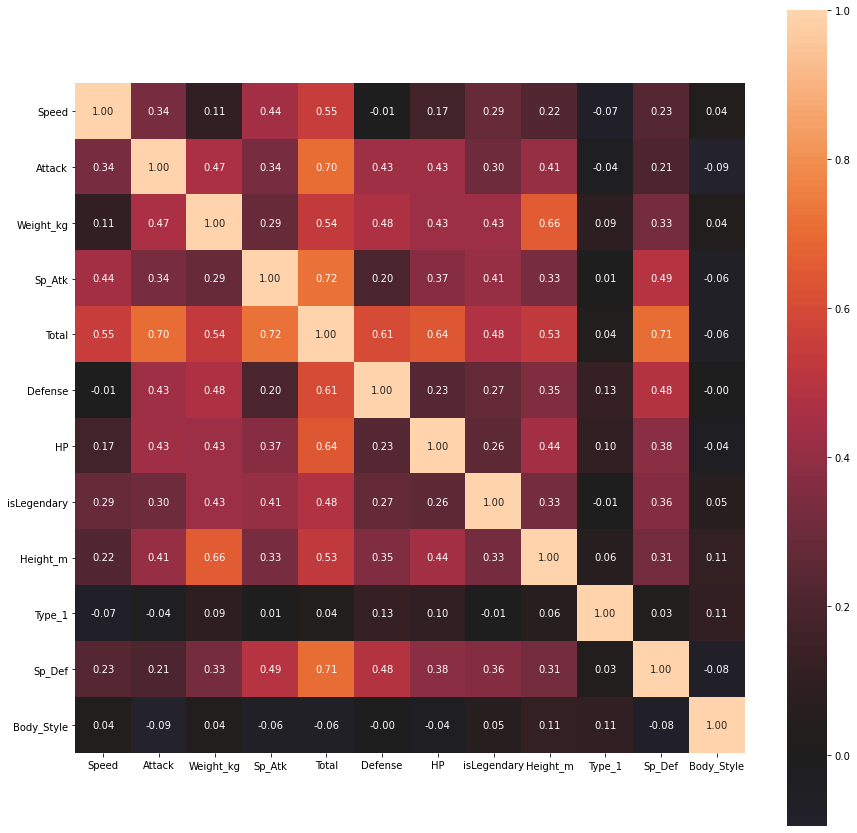

In [559]:
plt.figure(figsize = (15, 15))
df_corr = df[{"Type_1", "Total", "HP", "Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "isLegendary", "Height_m", 
              "Weight_kg", "Body_Style"}]
corr = df_corr.corr()
sns.heatmap(corr, vmax = 1, center = 0, annot = True, square = True, fmt = '.2f')

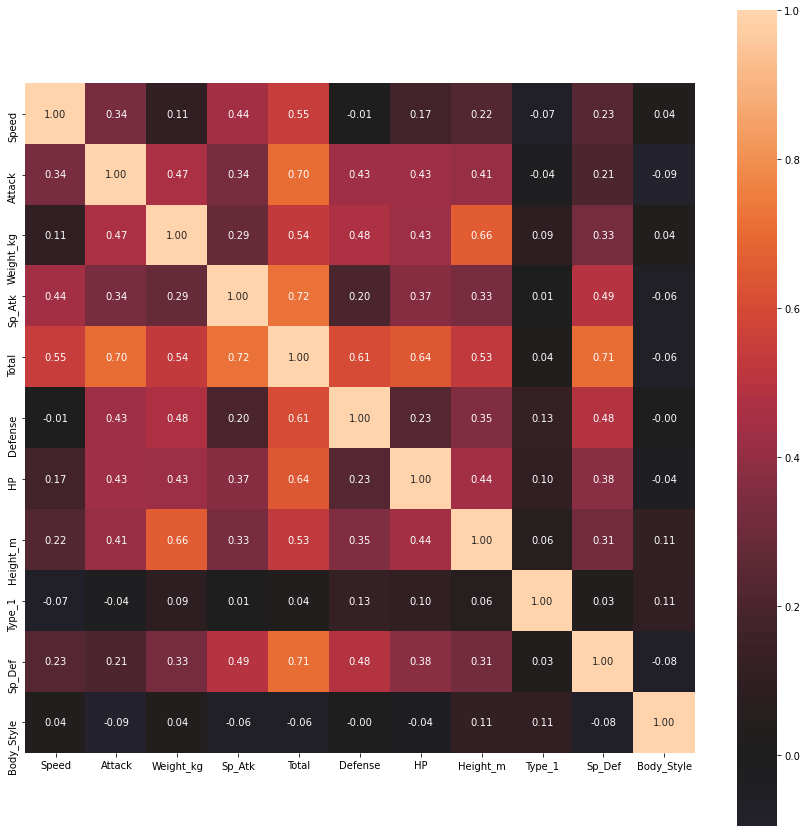

In [560]:
plt.figure(figsize = (15, 15))
df_corr = df[{"Type_1", "Total", "HP", "Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Height_m", 
              "Weight_kg", "Body_Style"}]
corr = df_corr.corr()
sns.heatmap(corr, vmax = 1, center = 0, annot = True, square = True, fmt = '.2f')

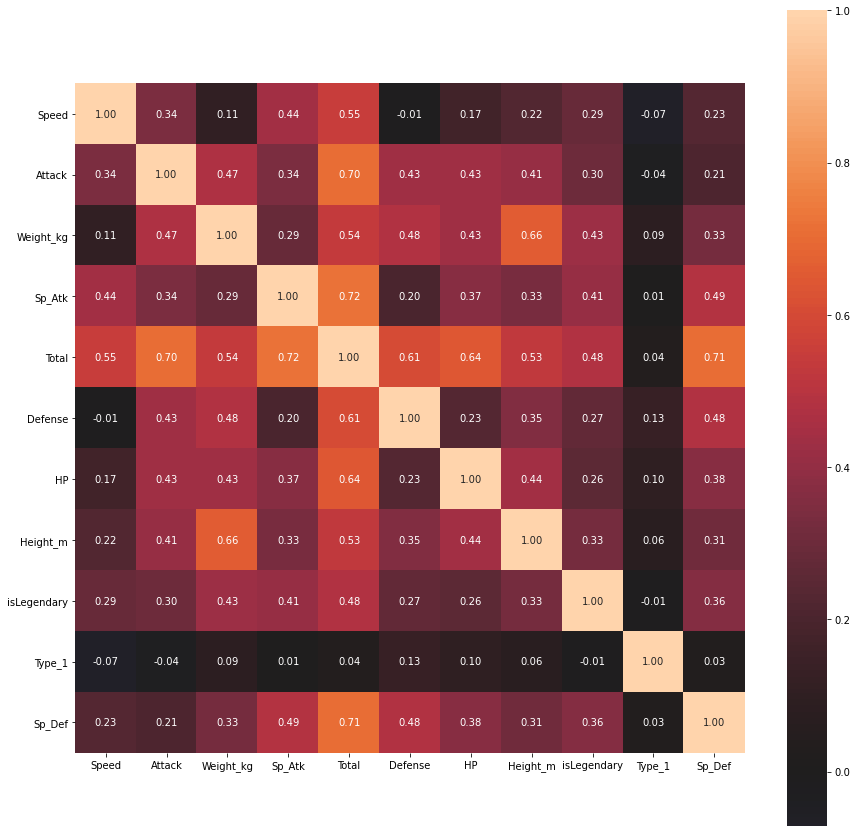

In [561]:
plt.figure(figsize = (15, 15))
df_corr = df[{"Type_1", "Total", "HP", "Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Height_m", 
              "Weight_kg", "isLegendary"}]
corr = df_corr.corr()
sns.heatmap(corr, vmax = 1, center = 0, annot = True, square = True, fmt = '.2f')

In [562]:
# X = df.drop(columns=['Number', 'Name', 'Type_2', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 
                     #'isLegendary', 'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2', 'Generation', 
                     #'hasMegaEvolution', 'Catch_Rate', 'Body_Style'])
Y = df['Body_Style']

In [563]:
X = df.drop(columns=['Number', 'Name', 'Type_2', 'isLegendary', 'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 
                     'Egg_Group_2', 'Generation', 'hasMegaEvolution', 'Catch_Rate', 'Body_Style'])
Y = df['Body_Style']

In [564]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, Y.values, test_size = 0.3)

In [565]:
#model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier

In [566]:
clf_list = {'Logistic Regression': LogisticRegression(), 
            'Gaussian NB': GaussianNB(), 
            'KNN': KNeighborsClassifier(),
            'DT': DecisionTreeClassifier(),
            'Random Forest': RandomForestClassifier(n_estimators=200),
            'Gradient Boosting': GradientBoostingClassifier(n_estimators=200),
            'ADA': AdaBoostClassifier(n_estimators=200),
            'SVM': OneVsOneClassifier(LinearSVC())}

In [567]:
from sklearn.metrics import accuracy_score, mean_squared_error, explained_variance_score

for name, clf in clf_list.items():
    model = clf.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('Accuracy of {}:'.format(name), accuracy_score(pred, y_test))
    print('')

C:\Users\space\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy of Logistic Regression: 0.1935483870967742

Accuracy of Gaussian NB: 0.17972350230414746

Accuracy of KNN: 0.17511520737327188

Accuracy of DT: 0.2534562211981567

Accuracy of Random Forest: 0.30414746543778803

Accuracy of Gradient Boosting: 0.2857142857142857

Accuracy of ADA: 0.21658986175115208



C:\Users\space\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\space\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\space\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\space\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\space\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\space\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\space\anaconda3\lib\site-packages\sklearn\svm\_base.py:

C:\Users\space\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\space\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\space\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\space\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\space\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\space\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\space\anaconda3\lib\site-packages\sklearn\svm\_base.py:

Accuracy of SVM: 0.2119815668202765



C:\Users\space\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\space\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\space\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [568]:
labels = np.array(df['Body_Style'])

#df= df.drop(['Number', 'Name', 'Type_2', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'isLegendary', 'Color', 'hasGender', 
 #            'Pr_Male', 'Egg_Group_1', 'Egg_Group_2', 'Generation', 'hasMegaEvolution', 'Catch_Rate', 'Body_Style'], axis = 1)

df= df.drop(['Number', 'Name', 'Type_2', 'isLegendary', 'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 
                     'Egg_Group_2', 'Generation', 'hasMegaEvolution', 'Catch_Rate', 'Body_Style'], axis = 1)
feature_list = list(df.columns)

df = np.array(df)

RF = RandomForestClassifier(n_estimators=10)
RF.fit(X_train, y_train)

estimator = RF.estimators_[5]

from sklearn.tree import export_graphviz

export_graphviz(estimator, out_file='tree.dot',
                feature_names = feature_list,
                filled=False, rounded=True, precision=2)

In [569]:
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [570]:
from IPython.display import Image
Image(filename = 'tree.png')

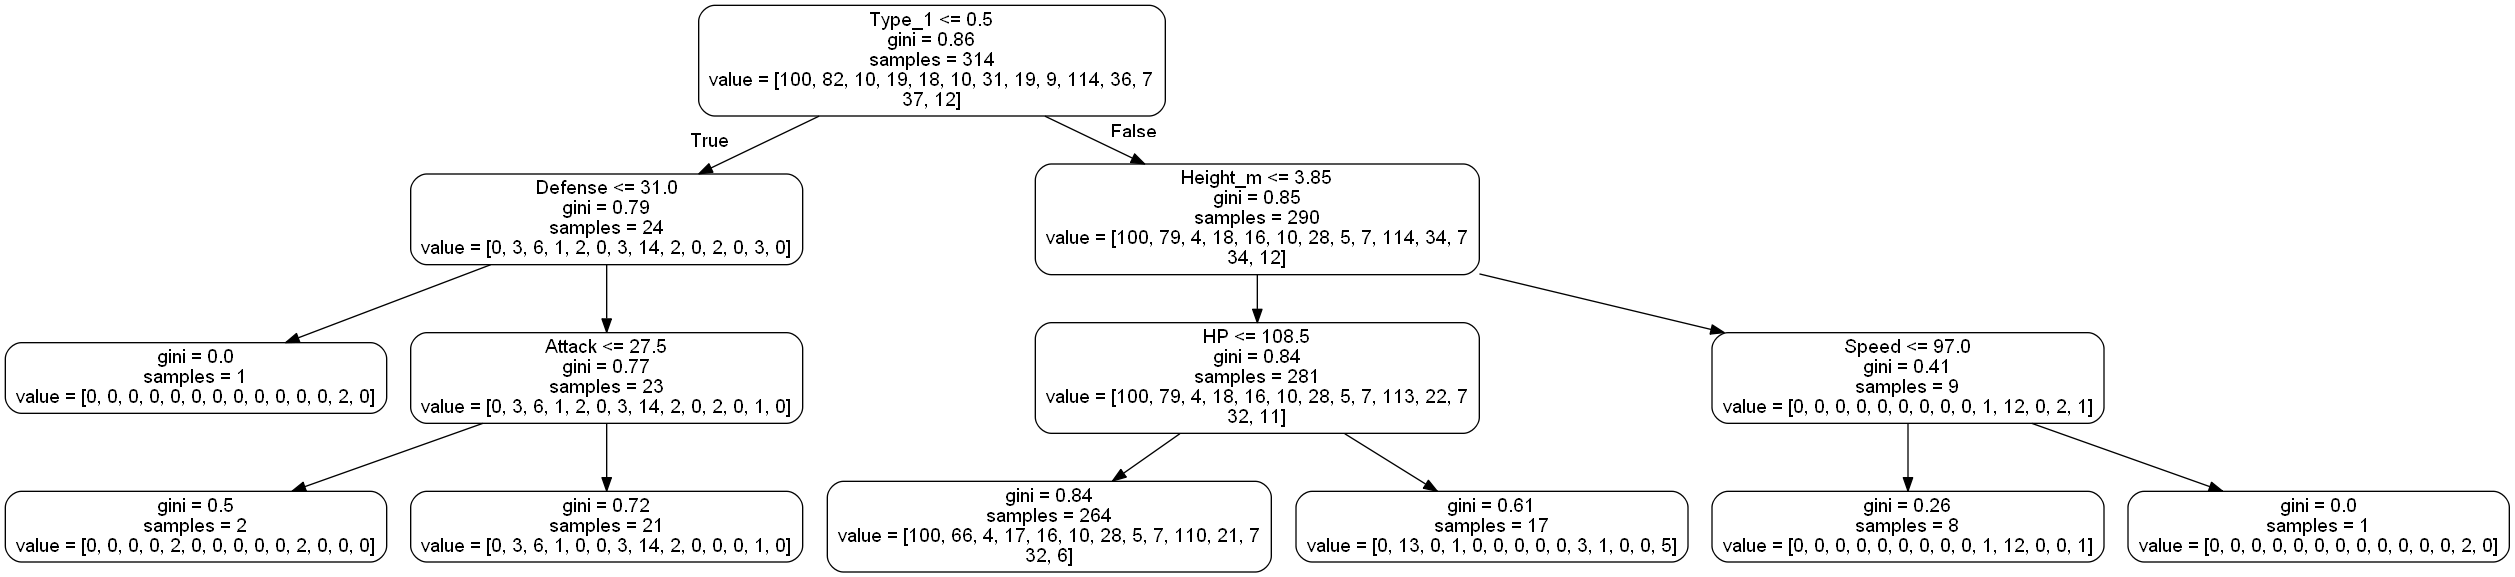

In [571]:
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)

tree_small = rf_small.estimators_[5]

export_graphviz(tree_small, out_file = 'small_tree.dot', 
                feature_names = feature_list, 
                filled=False, rounded = True, precision = 2)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')

from IPython.display import Image
Image(filename = 'small_tree.png')

In [572]:
feature_imp = pd.Series(RF.feature_importances_,index=feature_list).sort_values(ascending=False)
feature_imp

Weight_kg    0.129214
Speed        0.121060
Type_1       0.111448
Attack       0.103253
Total        0.096400
Defense      0.095158
HP           0.088807
Sp_Def       0.086401
Height_m     0.085426
Sp_Atk       0.082834
dtype: float64

No handles with labels found to put in legend.


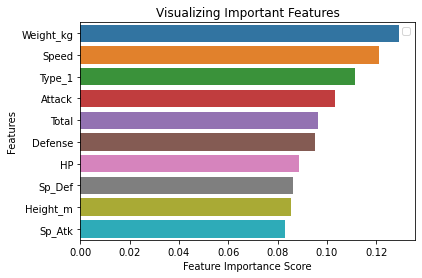

In [573]:
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [574]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
print(classification_report(y_train, RF.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       114
           1       0.97      0.99      0.98        77
           2       1.00      1.00      1.00        14
           3       1.00      0.95      0.97        20
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        10
           9       0.99      0.99      0.99        96
          10       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        10
          12       1.00      0.95      0.98        44
          13       1.00      0.90      0.95        20

    accuracy                           0.98       504
   macro avg       0.99      0.98      0.99       504
weighted avg       0.98      0.98      0.98       504



In [575]:
# AdaBoost Regressor model
ADA = AdaBoostClassifier(DecisionTreeClassifier())
ADA.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [576]:
feature_imp = pd.Series(ADA.feature_importances_,index=feature_list).sort_values(ascending=False)
feature_imp

C:\Users\space\anaconda3\lib\site-packages\sklearn\tree\_classes.py:578: RuntimeWarning:

invalid value encountered in true_divide



Total        0.274018
Type_1       0.102843
Speed        0.095987
Sp_Def       0.078290
Attack       0.062483
HP           0.062468
Sp_Atk       0.058843
Defense      0.058386
Height_m     0.045344
Weight_kg         NaN
dtype: float64

No handles with labels found to put in legend.


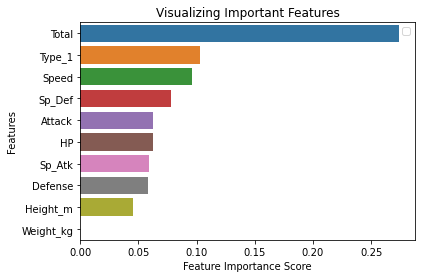

In [577]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()